# Bivariate Visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
df=pd.read_csv('fuel-econ.csv')

In [4]:
df.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


In [5]:
df.shape

(3929, 20)

## Scatter Plots

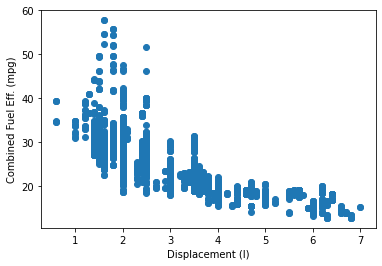

In [6]:
plt.scatter(data =df, x="displ", y="comb");
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

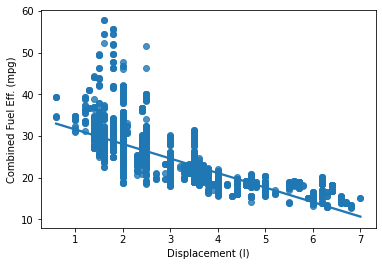

In [7]:
sns.regplot(data=df, x="displ", y="comb");
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

#### Overplotting, Transparency and Jitter

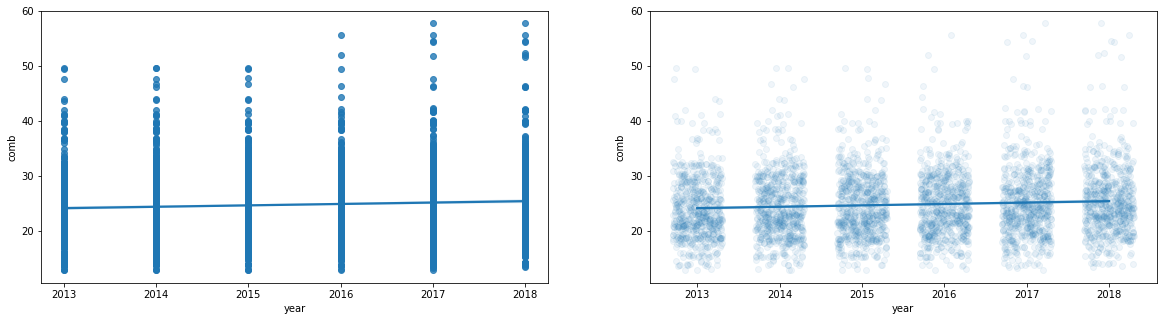

In [8]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.regplot(data=df, x="year", y="comb");

plt.subplot(1,2,2)
sns.regplot(data=df, x="year", y="comb",x_jitter=0.3,scatter_kws={'alpha':1/15});

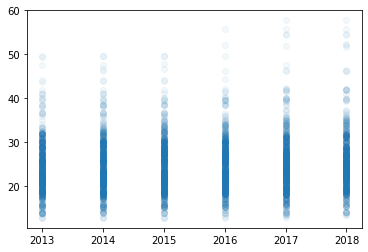

In [9]:
plt.scatter(data=df, x="year",y="comb",alpha=1/20);

## Heat Maps

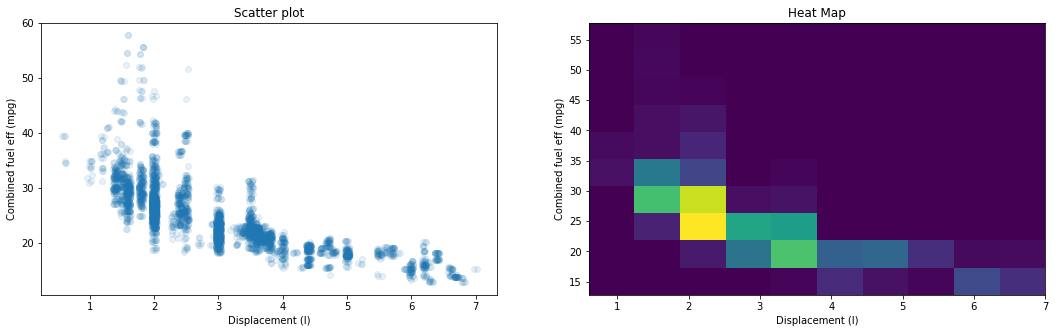

In [10]:
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
sns.regplot(data=df, x="displ", y="comb",x_jitter=0.04,scatter_kws={'alpha':0.1},fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff (mpg)')
plt.title('Scatter plot');

plt.subplot(1,2,2)
plt.hist2d(data=df, x="displ", y="comb");
plt.xlabel('Displacement (l)');
plt.ylabel('Combined fuel eff (mpg)');
plt.title('Heat Map');

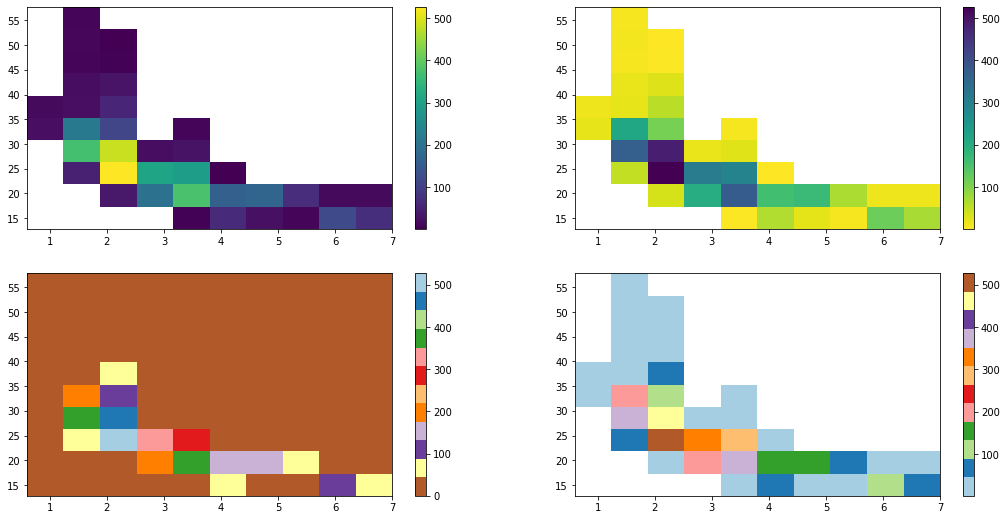

In [11]:
plt.figure(figsize=[18,9])

plt.subplot(2,2,1)
plt.hist2d(data=df, x="displ", y="comb", cmin=0.5,cmap='viridis');
plt.colorbar()

plt.subplot(2,2,2)
plt.hist2d(data=df, x="displ", y="comb", cmin=1,cmap='viridis_r');
plt.colorbar()

plt.subplot(2,2,3)
plt.hist2d(data=df, x="displ", y="comb",cmap='Paired_r');
plt.colorbar()

plt.subplot(2,2,4)
plt.hist2d(data=df, x="displ", y="comb",cmap='Paired',cmin=0.5);
plt.colorbar();

#### specify bin edges

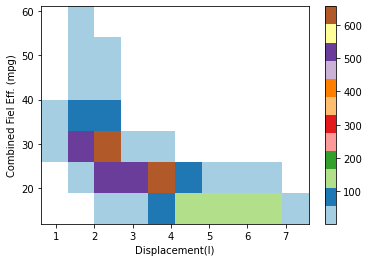

In [12]:
bins_x = np.arange(0.6,7+0.7,0.7)
bins_y = np.arange(12,58+7,7)

plt.hist2d(data=df, x="displ", y="comb", cmin=0.5, cmap='Paired', bins=[bins_x,bins_y]);
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fiel Eff. (mpg)');
plt.colorbar();

#### Annotations on ach cell

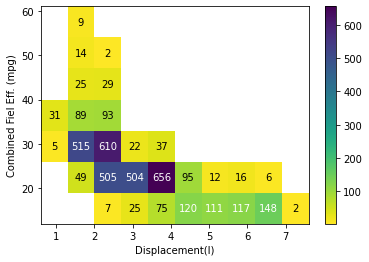

In [13]:
bins_x = np.arange(0.6,7+0.7,0.7)
bins_y = np.arange(12,58+7,7)

h2d=plt.hist2d(data=df, x="displ", y="comb", cmin=0.5, cmap='viridis_r', bins=[bins_x,bins_y]);
plt.colorbar()
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fiel Eff. (mpg)');

counts=h2d[0]
for i in range(counts.shape[0]):
    for j in range (counts.shape[1]):
        c=counts[i,j]
        if c >= 100: #increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5,int(c),ha="center",va="center", color= "white")
        elif c > 0:
            plt.text(bins_x[i]+0.35,bins_y[j]+3.5,int(c), ha="center", va="center", color="black")

In [14]:
print(counts)

[[ nan  nan   5.  31.  nan  nan  nan]
 [ nan  49. 515.  89.  25.  14.   9.]
 [  7. 505. 610.  93.  29.   2.  nan]
 [ 25. 504.  22.  nan  nan  nan  nan]
 [ 75. 656.  37.  nan  nan  nan  nan]
 [120.  95.  nan  nan  nan  nan  nan]
 [111.  12.  nan  nan  nan  nan  nan]
 [117.  16.  nan  nan  nan  nan  nan]
 [148.   6.  nan  nan  nan  nan  nan]
 [  2.  nan  nan  nan  nan  nan  nan]]


In [15]:
counts.shape

(10, 7)

In [16]:
for i in range(counts.shape[0]):
    for j in range (counts.shape[1]):
        c=counts[i,j]
        print(c)
        break

nan
nan
7.0
25.0
75.0
120.0
111.0
117.0
148.0
2.0


## Violin Plots

In [17]:
df.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


In [18]:
sedan_classes=df.VClass.value_counts().index
vclasses=pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass']=df.VClass.astype(vclasses)

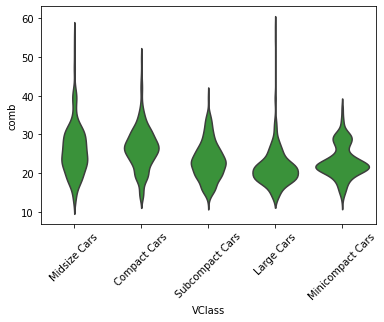

In [19]:
basecolor=sns.color_palette()[2]
sns.violinplot(data=df, x="VClass", y="comb", color= basecolor, inner=None);
plt.xticks(rotation=45);

In [20]:
df.VClass=df.VClass.astype('category')

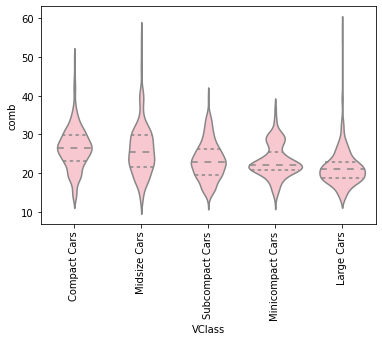

In [21]:
sns.violinplot(data=df, x="VClass", y="comb",order=df.groupby('VClass')['comb'].mean().sort_values(ascending=False).index,inner='quartile', color='pink');
plt.xticks(rotation=90);

In [22]:
df.groupby('VClass')['comb'].mean().sort_values(ascending=False)

VClass
Compact Cars        26.504232
Midsize Cars        26.180177
Subcompact Cars     23.303826
Minicompact Cars    23.152877
Large Cars          21.519717
Name: comb, dtype: float64

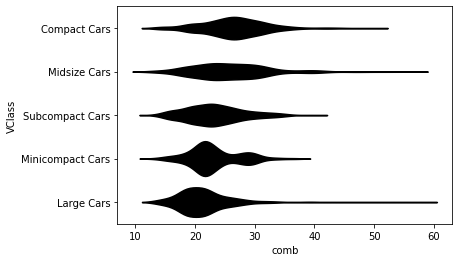

In [23]:
sns.violinplot(data=df, y="VClass", x="comb",order=df.groupby('VClass')['comb'].mean().sort_values(ascending=False).index,inner=None, color='black');

## Box Plots

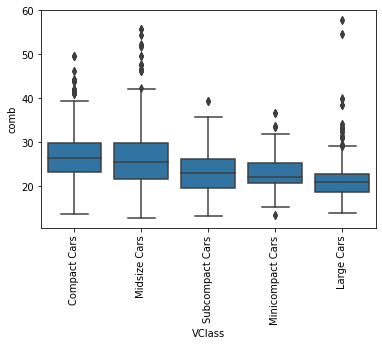

In [24]:
sns.boxplot(data=df, x="VClass", y="comb",order=df.groupby('VClass')['comb'].mean().sort_values(ascending=False).index, color=sns.color_palette()[0]);
plt.xticks(rotation=90);

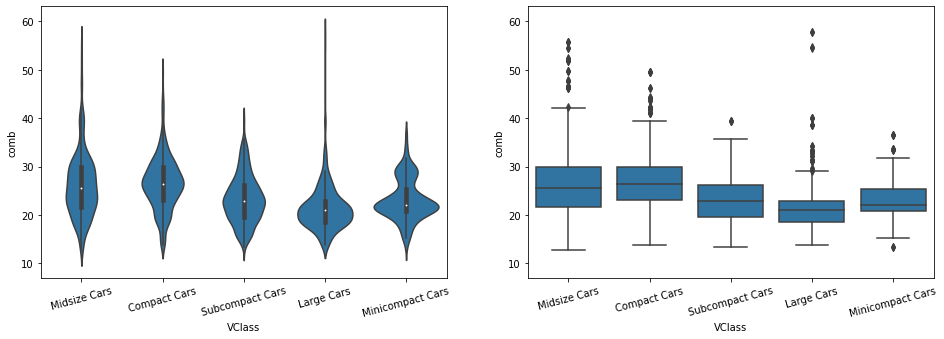

In [25]:
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]


plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=df, x='VClass', y='comb', color=base_color);
plt.xticks(rotation=15);

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='VClass', y='comb', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim());

## Clustered Bar charts

In [26]:
df['trans_type']=df['trans'].apply(lambda x: x.split()[0])

In [27]:
ct_counts=df.groupby(['VClass','trans_type']).size()
ct_counts

VClass            trans_type
Midsize Cars      Automatic     989
                  Manual        199
Compact Cars      Automatic     784
                  Manual        338
Subcompact Cars   Automatic     502
                  Manual        171
Large Cars        Automatic     605
                  Manual         20
Minicompact Cars  Automatic     188
                  Manual        133
dtype: int64

In [28]:
ct_counts=ct_counts.reset_index(name="count")
ct_counts

,VClass,trans_type,count
0,Midsize Cars,Automatic,989
1,Midsize Cars,Manual,199
2,Compact Cars,Automatic,784
3,Compact Cars,Manual,338
4,Subcompact Cars,Automatic,502
5,Subcompact Cars,Manual,171
6,Large Cars,Automatic,605
7,Large Cars,Manual,20
8,Minicompact Cars,Automatic,188
9,Minicompact Cars,Manual,133


In [29]:
ct_counts=ct_counts.pivot(index="VClass",columns="trans_type",values="count")
ct_counts

trans_type,Automatic,Manual
VClass,,
Midsize Cars,989,199
Compact Cars,784,338
Subcompact Cars,502,171
Large Cars,605,20
Minicompact Cars,188,133


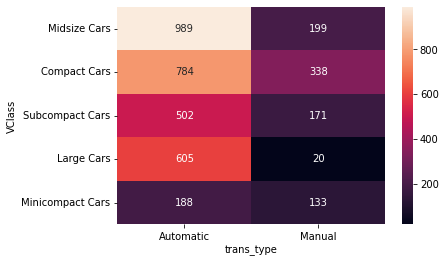

In [30]:
sns.heatmap(ct_counts,annot=True, fmt='d');

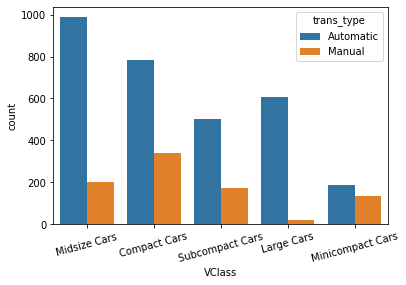

In [31]:
sns.countplot(data=df, x="VClass", hue="trans_type")
plt.xticks(rotation = 15);

In [32]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


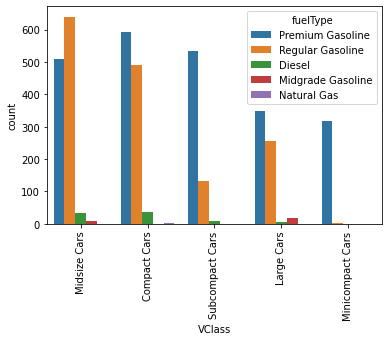

In [33]:
sns.countplot(data=df, x="VClass", hue="fuelType");
plt.xticks(rotation=90);

In [34]:
fuel_econ_sub = df.loc[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

In [35]:
fuel_econ_sub

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,...,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10,Automatic
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,...,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9,Automatic
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,...,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9,Automatic
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,...,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5,Automatic


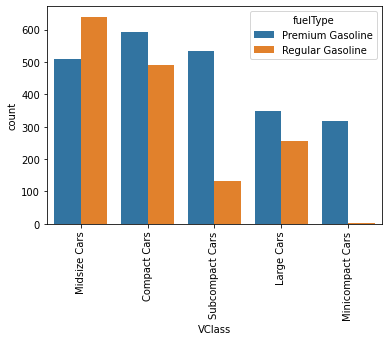

In [36]:
sns.countplot(data=fuel_econ_sub, x="VClass",hue="fuelType");
plt.xticks(rotation=90);

## Faceting

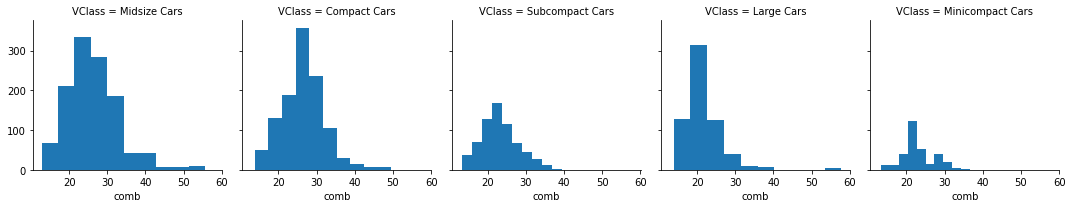

In [37]:
g=sns.FacetGrid(data=df, col="VClass");
g.map(plt.hist, 'comb');

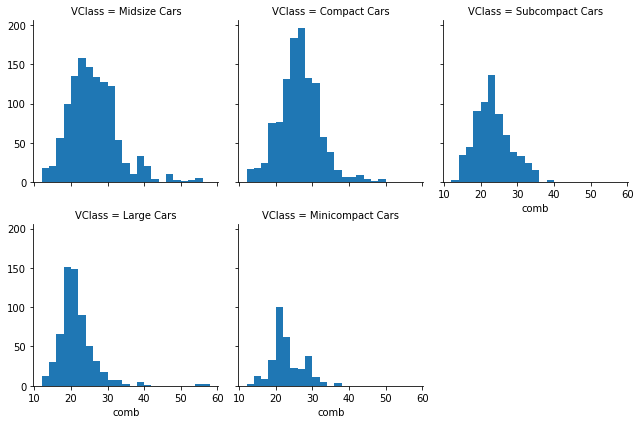

In [38]:
bins=np.arange(12,58+2,2)
g=sns.FacetGrid(data=df, col="VClass",col_wrap=3);
g.map(plt.hist, 'comb',bins=bins);

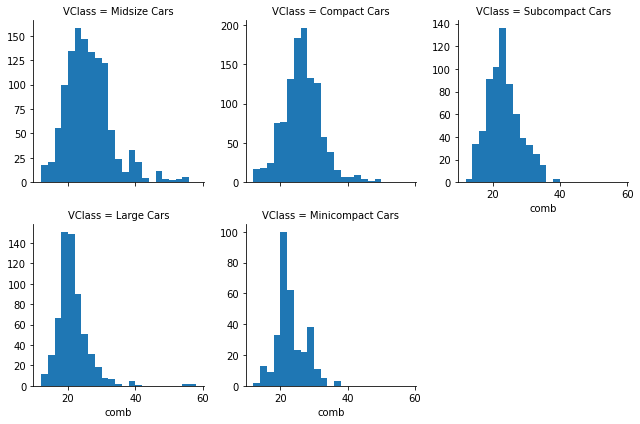

In [39]:
bins=np.arange(12,58+2,2)
g=sns.FacetGrid(data=df, col="VClass",col_wrap=3,sharey=False); #not encouraged because comparison cannot be outright done
g.map(plt.hist, 'comb',bins=bins);

In [40]:
group_names=df[['trans','comb']].groupby(['trans']).mean()
group_names

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893
Automatic (AM7),23.690389
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867
Automatic (AV-S6),31.246947


In [41]:
group_order=group_names.sort_values(['comb'], ascending=False).index
group_order

Index(['Automatic (variable gear ratios)', 'Automatic (A1)', 'Automatic (AM6)',
       'Automatic (AV-S6)', 'Automatic (AV-S7)', 'Manual 5-spd',
       'Automatic 4-spd', 'Automatic (AM8)', 'Automatic (AV-S10)',
       'Automatic (AM-S6)', 'Automatic (AV-S8)', 'Manual 6-spd',
       'Automatic (S6)', 'Automatic 6-spd', 'Automatic (S5)', 'Automatic (S9)',
       'Automatic (AM-S8)', 'Automatic (AM7)', 'Automatic 9-spd',
       'Automatic (S7)', 'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S10)', 'Automatic 7-spd', 'Automatic 8-spd',
       'Automatic 5-spd'],
      dtype='object', name='trans')

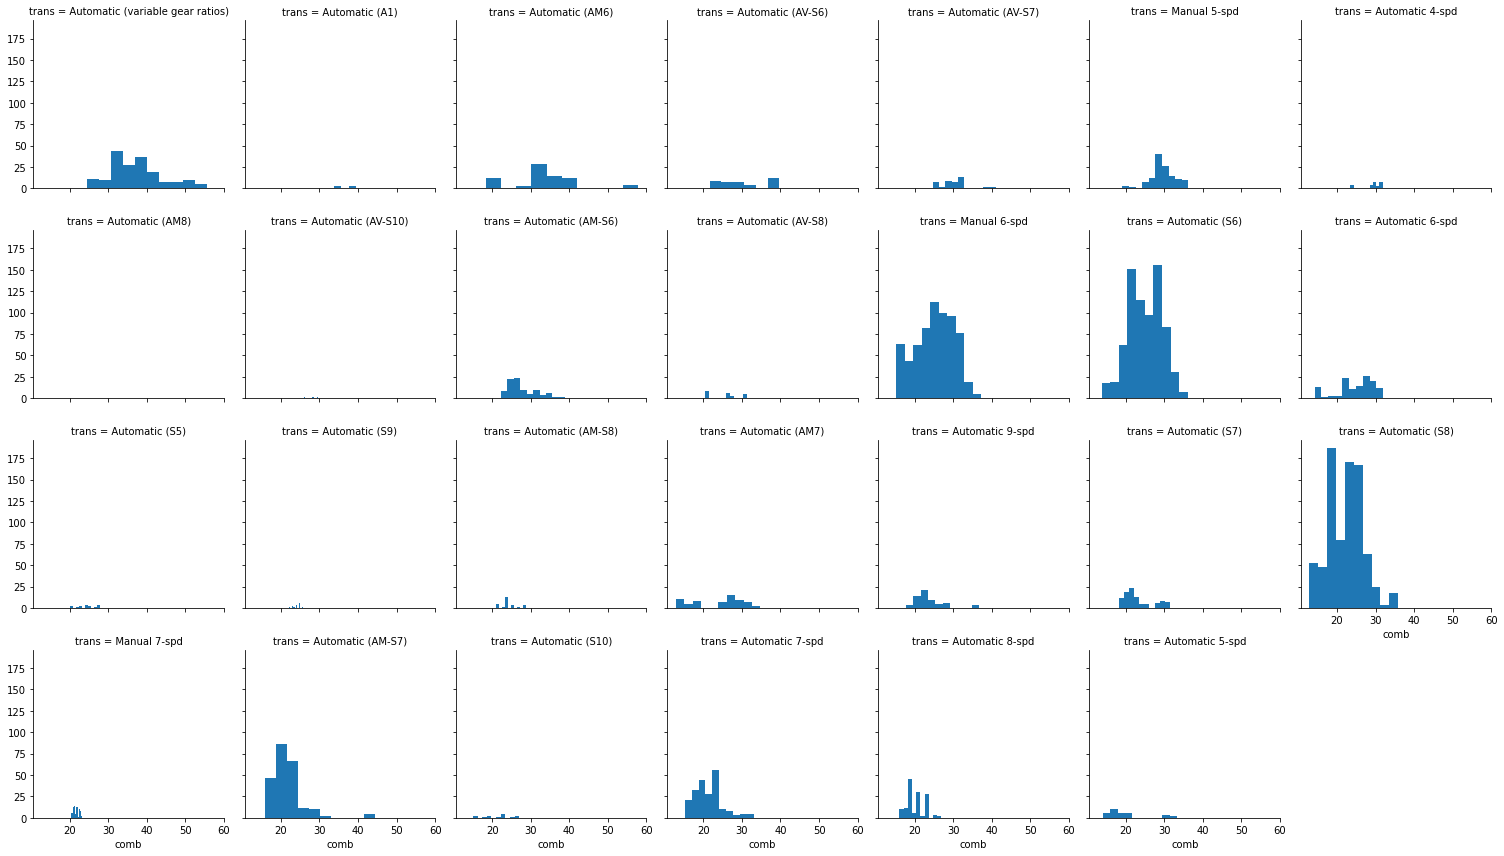

In [42]:
f = sns.FacetGrid(data = df, col = 'trans', col_wrap = 7, col_order = group_order)
f.map(plt.hist, 'comb');

## Adaptation of Univariate Plots

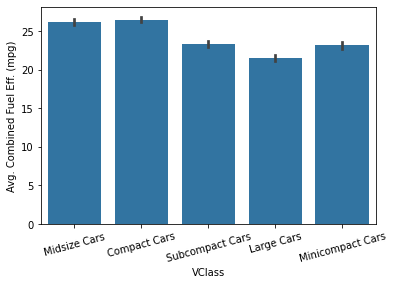

In [43]:
base_color=sns.color_palette()[0]
sns.barplot(data=df, x="VClass", y="comb", color=base_color);
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

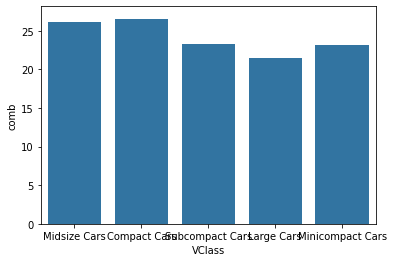

In [44]:
#removing the 
sns.barplot(data=df, x='VClass', y='comb', color=base_color, errwidth=0);

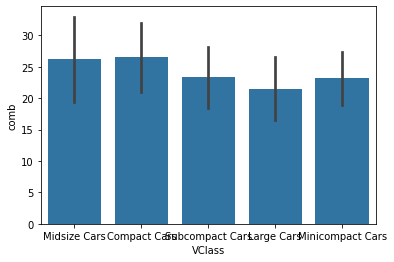

In [45]:
sns.barplot(data=df, x='VClass', y='comb', color=base_color, ci='sd');

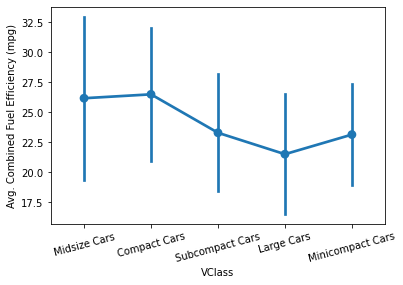

In [46]:
#alternative plots
sns.pointplot(data=df, x='VClass', y='comb', color=base_color, ci='sd',)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

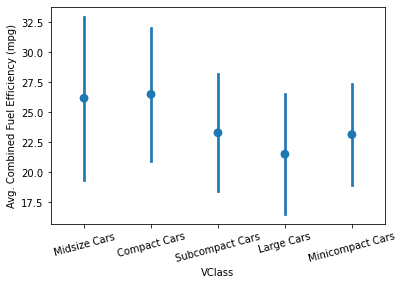

In [47]:
sns.pointplot(data=df, x='VClass', y='comb', color=base_color, ci='sd',linestyles="");
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

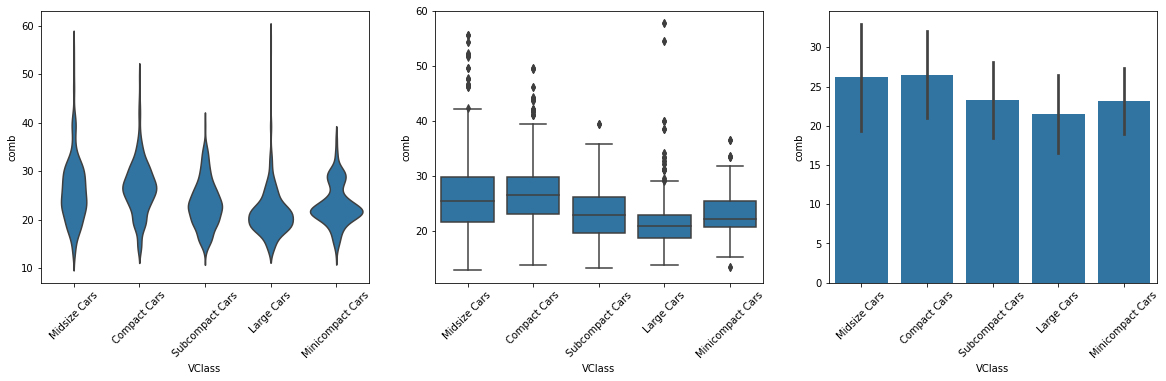

In [48]:
plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]

plt.subplot(1, 3, 1)
sns.violinplot(data=df, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); 


plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);


plt.subplot(1, 3, 3)
sns.barplot(data=df, x='VClass', y='comb', color = base_color, ci="sd")
plt.xticks(rotation = 45);

## Line plots

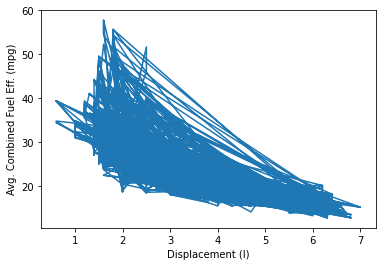

In [49]:
#lets start by plotting an error bar
plt.errorbar(data=df, x="displ", y="comb")
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

In [60]:
bins_e=np.arange(0.6,7+0.2,0.2)
bins_c = bins_e[:-1] + 0.1 #bin centers. For accurate point plotting. Exluding the last point

displ_binned=pd.cut(df['displ'], bins_e, include_lowest=False)
comb_mean=df['comb'].groupby(displ_binned).mean()

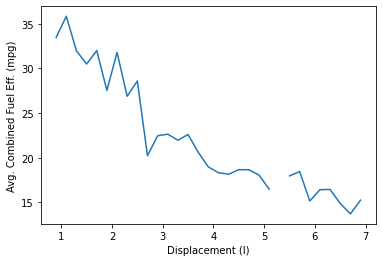

In [61]:
plt.errorbar(x=bins_c, y=comb_mean);
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

In [52]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


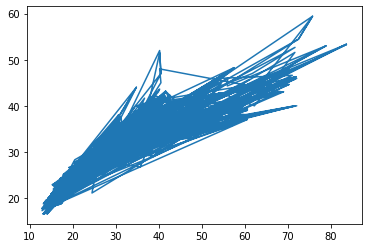

In [53]:
plt.errorbar(data=df,x="UCity", y="highway");

In [54]:
binsz=np.arange(10,90+10,10)
binsd=binsz[:-1]+0.1 #centering content

UcBinned=pd.cut(df['UCity'], binsz, include_lowest=True)
HighMean=df['highway'].groupby(UcBinned).mean()

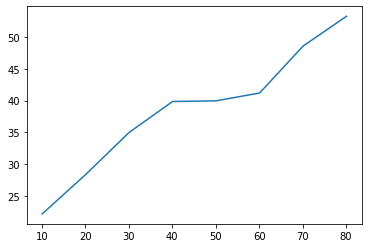

In [55]:
plt.errorbar(x=binsd, y=HighMean);

<ErrorbarContainer object of 3 artists>

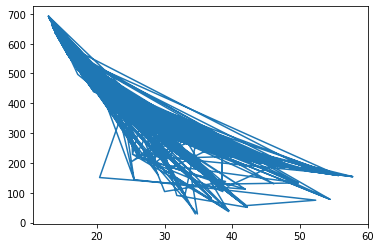

In [56]:
plt.errorbar(data=df, x="comb", y="co2")

<ErrorbarContainer object of 3 artists>

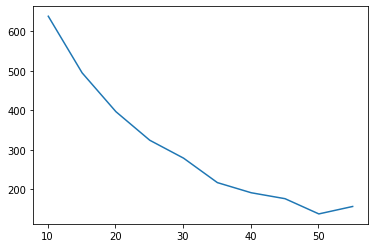

In [57]:
binsc=np.arange(5,60+5,5)
bins2=binsc[:-1]+0.1 

CombBinned=pd.cut(df['comb'], binsc, include_lowest=True)
Co2Grouped=df['co2'].groupby(CombBinned).mean()

plt.errorbar(x=bins2, y=Co2Grouped)